In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

df=pd.read_csv('ecommerce_sales_large.csv')
df.head(10)

,Transaction ID,Product ID,Product Name,Category,Price,Quantity Sold,Customer Age,Customer Gender,Transaction Date,Payment Method,Discount,Region,Membership Status
0,1,2,Smartphone,Electronics,502.28,5,57,Female,12-04-2023,PayPal,0.29,North America,Premium
1,2,1,Laptop,Electronics,842.56,4,22,Male,20-06-2023,Bank Transfer,0.07,Asia,Premium
2,3,5,Tablet,Electronics,499.13,4,64,Male,08-05-2023,Bank Transfer,0.13,North America,Regular
3,4,5,Tablet,Electronics,234.48,3,22,Male,10-09-2023,Bank Transfer,0.07,Africa,Premium
4,5,2,Smartphone,Electronics,1032.78,3,48,Male,11-04-2023,Bank Transfer,0.17,Asia,Regular
5,6,1,Laptop,Electronics,702.20,5,57,Male,01-10-2023,Credit Card,0.26,Europe,Regular
6,7,2,Smartphone,Electronics,84.59,5,41,Female,12-01-2023,Bank Transfer,0.22,Asia,Regular
7,8,5,Tablet,Electronics,540.66,3,20,Male,30-10-2023,Credit Card,0.22,Africa,Regular
8,9,5,Tablet,Electronics,685.05,1,44,Female,15-09-2023,Bank Transfer,0.30,Asia,Regular
9,10,3,Headphones,Accessories,1280.46,5,61,Male,31-10-2023,Credit Card,0.08,Africa,Premium


In [61]:
df.shape

(10000, 13)

In [62]:
df.dtypes

Transaction ID         int64
Product ID             int64
Product Name          object
Category              object
Price                float64
Quantity Sold          int64
Customer Age           int64
Customer Gender       object
Transaction Date      object
Payment Method        object
Discount             float64
Region                object
Membership Status     object
dtype: object

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction ID     10000 non-null  int64  
 1   Product ID         10000 non-null  int64  
 2   Product Name       10000 non-null  object 
 3   Category           10000 non-null  object 
 4   Price              10000 non-null  float64
 5   Quantity Sold      10000 non-null  int64  
 6   Customer Age       10000 non-null  int64  
 7   Customer Gender    10000 non-null  object 
 8   Transaction Date   10000 non-null  object 
 9   Payment Method     10000 non-null  object 
 10  Discount           10000 non-null  float64
 11  Region             10000 non-null  object 
 12  Membership Status  10000 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 1015.8+ KB


In [64]:
df.describe()

,Transaction ID,Product ID,Price,Quantity Sold,Customer Age,Discount
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,3.011100,774.160559,2.986200,41.516800,0.149865
std,2886.89568,1.407258,416.832925,1.406843,13.891062,0.086350
min,1.00000,1.000000,50.000000,1.000000,18.000000,0.000000
25%,2500.75000,2.000000,415.972500,2.000000,29.000000,0.080000
50%,5000.50000,3.000000,775.725000,3.000000,42.000000,0.150000
75%,7500.25000,4.000000,1135.880000,4.000000,54.000000,0.220000
max,10000.00000,5.000000,1499.940000,5.000000,65.000000,0.300000


In [65]:
df.isnull().sum() #no missing values in columns

Transaction ID       0
Product ID           0
Product Name         0
Category             0
Price                0
Quantity Sold        0
Customer Age         0
Customer Gender      0
Transaction Date     0
Payment Method       0
Discount             0
Region               0
Membership Status    0
dtype: int64

In [66]:
df[df.isnull().any(axis=1)] # no missing values in rows

,Transaction ID,Product ID,Product Name,Category,Price,Quantity Sold,Customer Age,Customer Gender,Transaction Date,Payment Method,Discount,Region,Membership Status


In [67]:
df.duplicated().sum() # no duplicate values

0

In [68]:
df.nunique()

Transaction ID       10000
Product ID               5
Product Name             5
Category                 2
Price                 9668
Quantity Sold            5
Customer Age            48
Customer Gender          2
Transaction Date       365
Payment Method           4
Discount                31
Region                   5
Membership Status        2
dtype: int64

In [69]:
# the data type of 'Transaction Date' column is object. so converting datatype object to datetime.
df['Transaction Date']=pd.to_datetime(df['Transaction Date'],format='%d-%m-%Y')
df.dtypes

Transaction ID                int64
Product ID                    int64
Product Name                 object
Category                     object
Price                       float64
Quantity Sold                 int64
Customer Age                  int64
Customer Gender              object
Transaction Date     datetime64[ns]
Payment Method               object
Discount                    float64
Region                       object
Membership Status            object
dtype: object

OUTLIER ANALYSIS

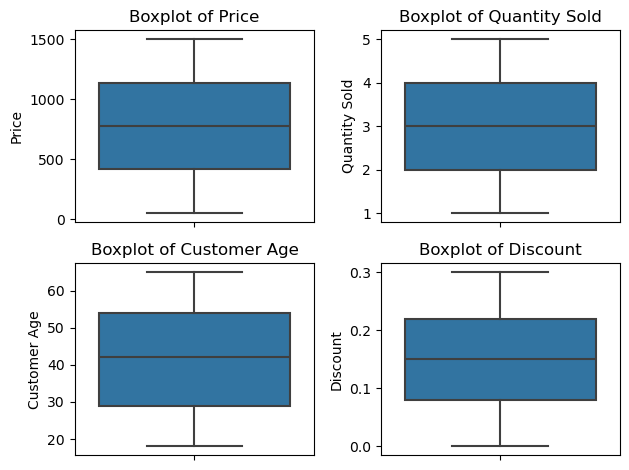

In [70]:
# plotting outliers(there is no outliers)
import seaborn as sns
outlier= ['Price', 'Quantity Sold', 'Customer Age','Discount']
# plt.figure(figsize=(10,5))
for i,col in enumerate(outlier,1):
    plt.subplot(2,2,i) ## Create a 2x2 grid of plots
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

EXPLRATORY DATA ANALYSIS

<Axes: xlabel='count', ylabel='Region'>

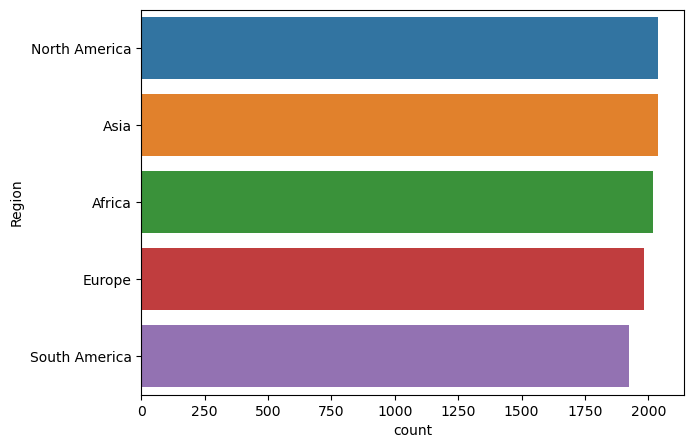

In [71]:
# plotting bartplot by Region to understand Regionwise data
plt.figure(figsize=(7,5))
sns.countplot(y='Region',data=df)

AGE DISTRIBUTION OF CUSTOMERS ACROSS AGE GROUPS

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


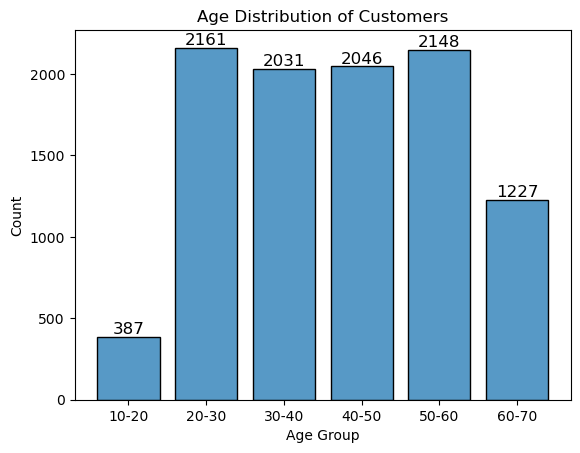

In [72]:
#Exploratory Data Analysis
#To show the "age distribution of customers"

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

age_bins = [10, 20, 30, 40, 50, 60, 70]
age_labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70']

df['Age Group'] = pd.cut(df["Customer Age"], bins=age_bins, labels=age_labels, right=False)

ax = sns.histplot(df['Age Group'], discrete=True, shrink=0.8)

# Adding count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)


plt.title("Age Distribution of Customers")
plt.show()

GENDER PROPORTION ACROSS DATASET

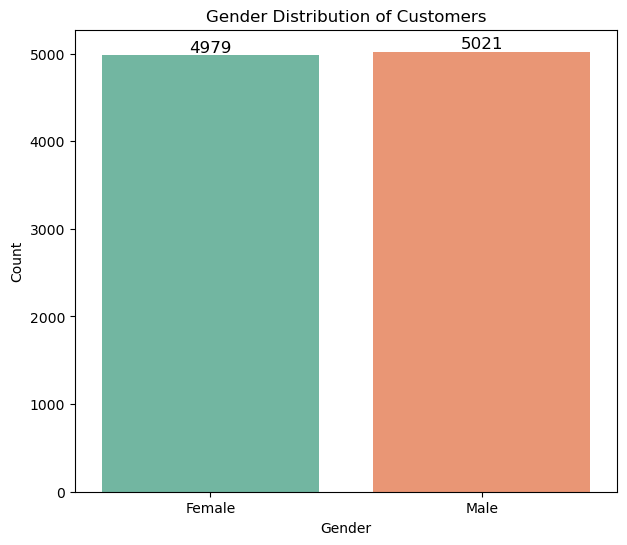

In [73]:
#gender proportions
import seaborn as sns
import matplotlib.pyplot as plt

# Gender proportions
plt.figure(figsize=(7, 6))
ax = sns.countplot(data=df, x='Customer Gender', palette='Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)
# Add title and labels
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

MOST BOUGHT PRODUCT BY AGE GROUP

C:\Users\User\AppData\Local\Temp\ipykernel_7764\3785059219.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_product_spend = df.groupby(['Age Group', 'Product Name'])['Total Spend'].sum().reset_index()
C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to 

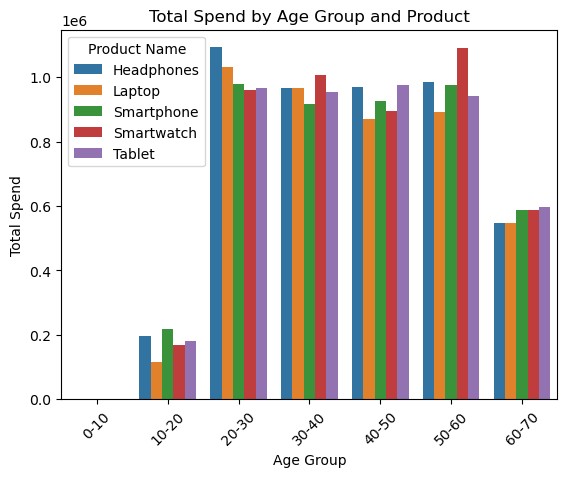

In [74]:
# To visualize the most bought product for different age groups
import seaborn as sns
import matplotlib.pyplot as plt

df['Age Group'] = pd.cut(df['Customer Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70], labels=['0-10','10-20', '20-30', '30-40', '40-50', '50-60', '60-70'], right=False)
df['Total Spend'] = df['Price'] * df['Quantity Sold']
age_product_spend = df.groupby(['Age Group', 'Product Name'])['Total Spend'].sum().reset_index()

sns.barplot(data=age_product_spend, x='Age Group', y='Total Spend', hue='Product Name')

plt.title('Total Spend by Age Group and Product')
plt.xticks(rotation=45)
plt.show()


MOST SELLING CATEGORY AND PRODUCT

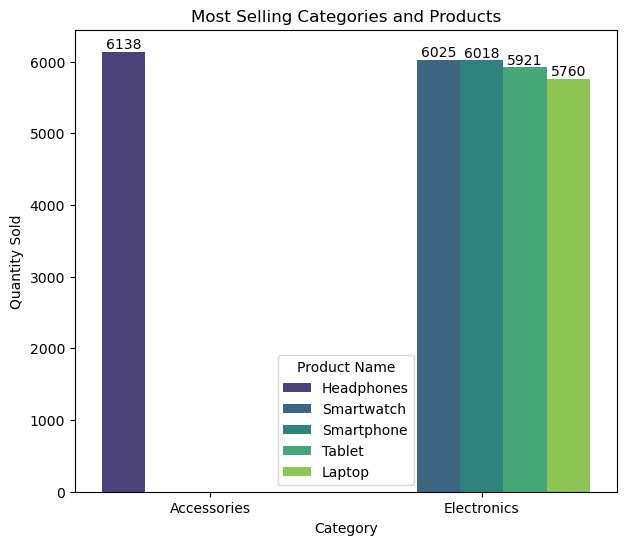

In [75]:
#Purchasing pattern analysis for  customer preferences across different categories.
import seaborn as sns
import matplotlib.pyplot as plt

category_product_sales = df.groupby(['Category', 'Product Name'])['Quantity Sold'].sum().reset_index()

# Sort by most selling product within each category
category_product_sales = category_product_sales.sort_values(['Category', 'Quantity Sold'], ascending=[True, False])
plt.figure(figsize=(7, 6))
ax = sns.barplot(data=category_product_sales, x='Category', y='Quantity Sold', hue='Product Name', palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)
plt.title('Most Selling Categories and Products')
plt.xlabel('Category')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=0)
plt.show()


CUSTOMER DISTRIBUTION BY MEMBERSHIP STATUS BASED ON REGION

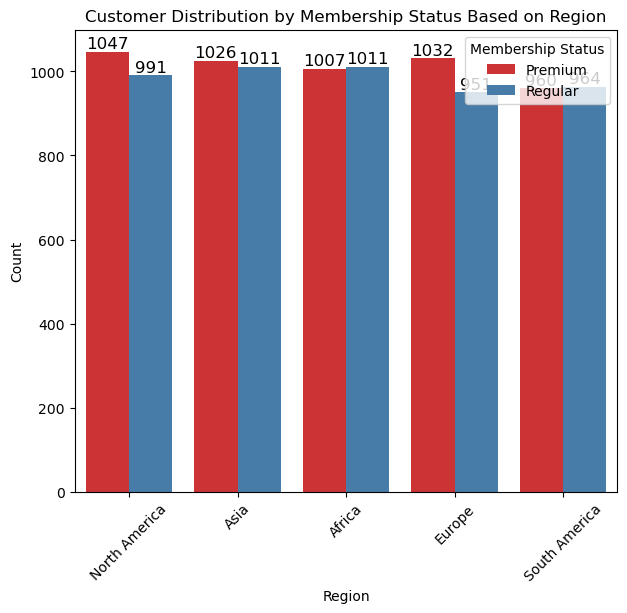

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 6))
ax = sns.countplot(data=df, x='Region', hue='Membership Status', palette='Set1')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)
plt.title('Customer Distribution by Membership Status Based on Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Membership Status')
plt.show()

K-MEANS CLUSTERING

In [77]:
df.head(5)

,Transaction ID,Product ID,Product Name,Category,Price,Quantity Sold,Customer Age,Customer Gender,Transaction Date,Payment Method,Discount,Region,Membership Status,Age Group,Total Spend
0,1,2,Smartphone,Electronics,502.28,5,57,Female,2023-04-12,PayPal,0.29,North America,Premium,50-60,2511.40
1,2,1,Laptop,Electronics,842.56,4,22,Male,2023-06-20,Bank Transfer,0.07,Asia,Premium,20-30,3370.24
2,3,5,Tablet,Electronics,499.13,4,64,Male,2023-05-08,Bank Transfer,0.13,North America,Regular,60-70,1996.52
3,4,5,Tablet,Electronics,234.48,3,22,Male,2023-09-10,Bank Transfer,0.07,Africa,Premium,20-30,703.44
4,5,2,Smartphone,Electronics,1032.78,3,48,Male,2023-04-11,Bank Transfer,0.17,Asia,Regular,40-50,3098.34


In [78]:
# Drop unnecessary columns
df.drop(columns=['Transaction ID', 'Product ID', 'Transaction Date','Age Group', 'Total Spend'], inplace=True)
df.head(3)

,Product Name,Category,Price,Quantity Sold,Customer Age,Customer Gender,Payment Method,Discount,Region,Membership Status
0,Smartphone,Electronics,502.28,5,57,Female,PayPal,0.29,North America,Premium
1,Laptop,Electronics,842.56,4,22,Male,Bank Transfer,0.07,Asia,Premium
2,Tablet,Electronics,499.13,4,64,Male,Bank Transfer,0.13,North America,Regular


In [79]:
categorical_cols = ['Product Name', 'Category', 'Customer Gender', 'Payment Method', 'Region', 'Membership Status']

# One-Hot Encoding (without dropping any category)
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  
encoded_features = encoder.fit_transform(df[categorical_cols])


encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

df = df.drop(columns=categorical_cols)
df_encoded = pd.concat([df, encoded_df], axis=1)

# Verify if all categories are included
print("Final Encoded Columns:", df_encoded.columns)

Final Encoded Columns: Index(['Price', 'Quantity Sold', 'Customer Age', 'Discount',
       'Product Name_Headphones', 'Product Name_Laptop',
       'Product Name_Smartphone', 'Product Name_Smartwatch',
       'Product Name_Tablet', 'Category_Accessories', 'Category_Electronics',
       'Customer Gender_Female', 'Customer Gender_Male',
       'Payment Method_Bank Transfer', 'Payment Method_Credit Card',
       'Payment Method_Debit Card', 'Payment Method_PayPal', 'Region_Africa',
       'Region_Asia', 'Region_Europe', 'Region_North America',
       'Region_South America', 'Membership Status_Premium',
       'Membership Status_Regular'],
      dtype='object')


In [81]:
numerical_cols = ['Price', 'Quantity Sold', 'Customer Age', 'Discount']

# Standardize using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded[numerical_cols])

# Convert scaled features to DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=[f"{col}_scaled" for col in numerical_cols])

# Drop original numerical columns and concatenate scaled ones
df_final = df_encoded.drop(columns=numerical_cols)
df_final = pd.concat([df_final, scaled_df], axis=1)

# Display final structure
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Product Name_Headphones       10000 non-null  float64
 1   Product Name_Laptop           10000 non-null  float64
 2   Product Name_Smartphone       10000 non-null  float64
 3   Product Name_Smartwatch       10000 non-null  float64
 4   Product Name_Tablet           10000 non-null  float64
 5   Category_Accessories          10000 non-null  float64
 6   Category_Electronics          10000 non-null  float64
 7   Customer Gender_Female        10000 non-null  float64
 8   Customer Gender_Male          10000 non-null  float64
 9   Payment Method_Bank Transfer  10000 non-null  float64
 10  Payment Method_Credit Card    10000 non-null  float64
 11  Payment Method_Debit Card     10000 non-null  float64
 12  Payment Method_PayPal         10000 non-null  float64
 13  Re

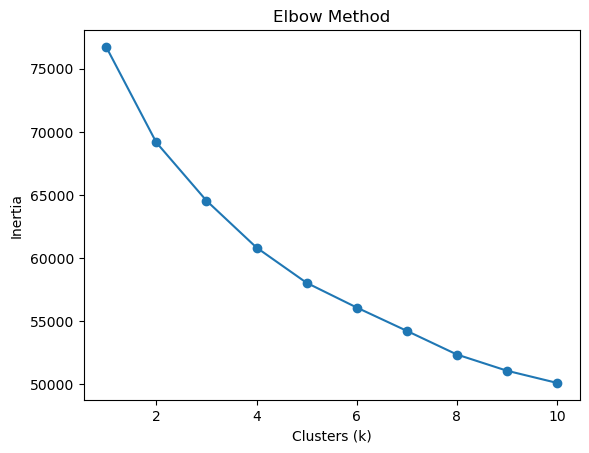

Silhouette Score for k=2: 0.0940
Silhouette Score for k=3: 0.0813
Silhouette Score for k=4: 0.0841
Silhouette Score for k=5: 0.0842
Silhouette Score for k=6: 0.0795
Silhouette Score for k=7: 0.0801
Silhouette Score for k=8: 0.0858
Silhouette Score for k=9: 0.0865
Silhouette Score for k=10: 0.0862


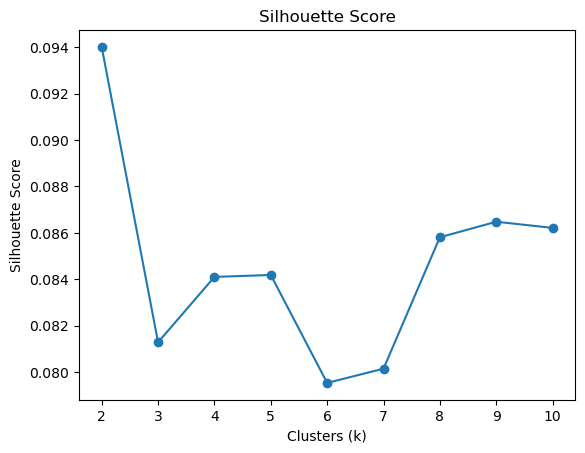

Optimal k based on Silhouette Score: 2


In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

K_range = range(1, 11)

# Elbow Method
inertia = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(df_final).inertia_ for k in K_range]
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    labels = KMeans(n_clusters=k, random_state=42, n_init=10).fit_predict(df_final)
    score = silhouette_score(df_final, labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={k}: {score:.4f}")

# Plot Silhouette Scores
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

best_k = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal k based on Silhouette Score: {best_k}")


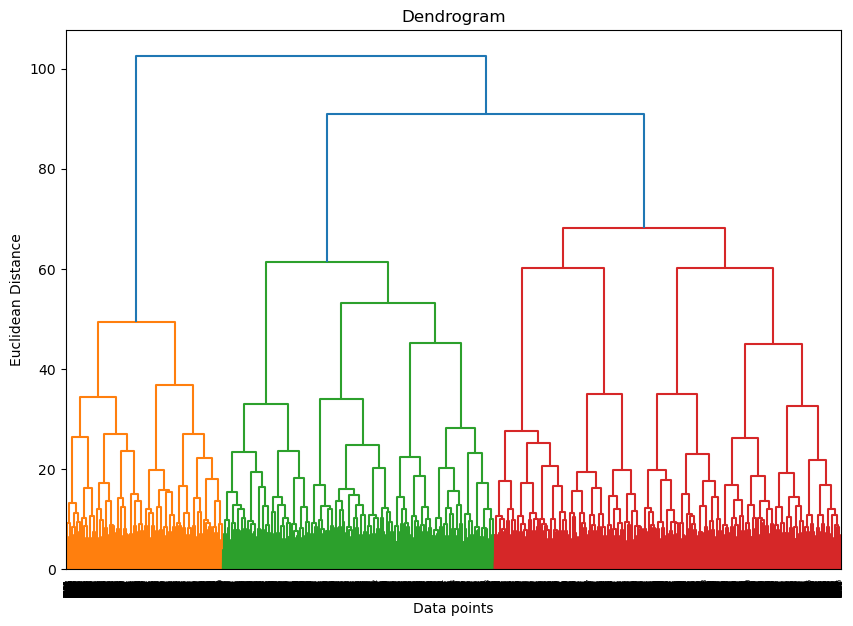

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette Score for k=2: 0.0907


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette Score for k=3: 0.0737


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette Score for k=4: 0.0535


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette Score for k=5: 0.0410


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette Score for k=6: 0.0330


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette Score for k=7: 0.0308


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette Score for k=8: 0.0308


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette Score for k=9: 0.0369


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette Score for k=10: 0.0338


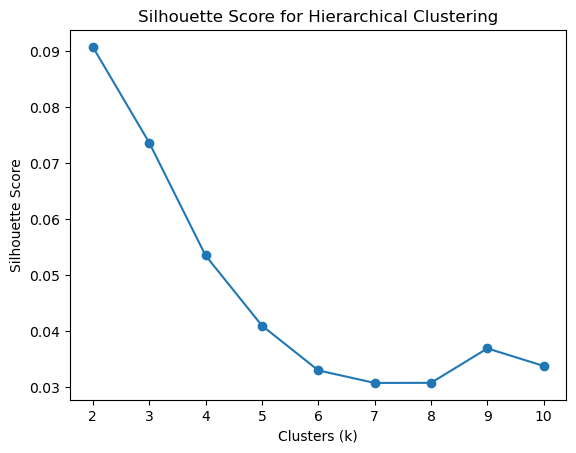

Optimal k based on Silhouette Score: 2


In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Plot Dendrogram to visualize the cluster hierarchy
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df_final, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean Distance')
plt.show()

# --- Silhouette Score for Hierarchical Clustering ---
silhouette_scores = []
k_range = range(2, 11)  # Trying k=2 to k=10 clusters

for k in k_range:
    # Perform Agglomerative Hierarchical Clustering
    hierarchical_clustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    labels = hierarchical_clustering.fit_predict(df_final)
    
    # Calculate silhouette score
    score = silhouette_score(df_final, labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={k}: {score:.4f}")

# --- Plot Silhouette Scores ---
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Hierarchical Clustering')
plt.show()

# --- Find the Best k based on Silhouette Score ---
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal k based on Silhouette Score: {best_k}")


In [84]:
df_final.columns

Index(['Product Name_Headphones', 'Product Name_Laptop',
       'Product Name_Smartphone', 'Product Name_Smartwatch',
       'Product Name_Tablet', 'Category_Accessories', 'Category_Electronics',
       'Customer Gender_Female', 'Customer Gender_Male',
       'Payment Method_Bank Transfer', 'Payment Method_Credit Card',
       'Payment Method_Debit Card', 'Payment Method_PayPal', 'Region_Africa',
       'Region_Asia', 'Region_Europe', 'Region_North America',
       'Region_South America', 'Membership Status_Premium',
       'Membership Status_Regular', 'Price_scaled', 'Quantity Sold_scaled',
       'Customer Age_scaled', 'Discount_scaled'],
      dtype='object')

In [86]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df_final['Cluster'] = kmeans.fit_predict(df_final)  # Add cluster labels to df_final



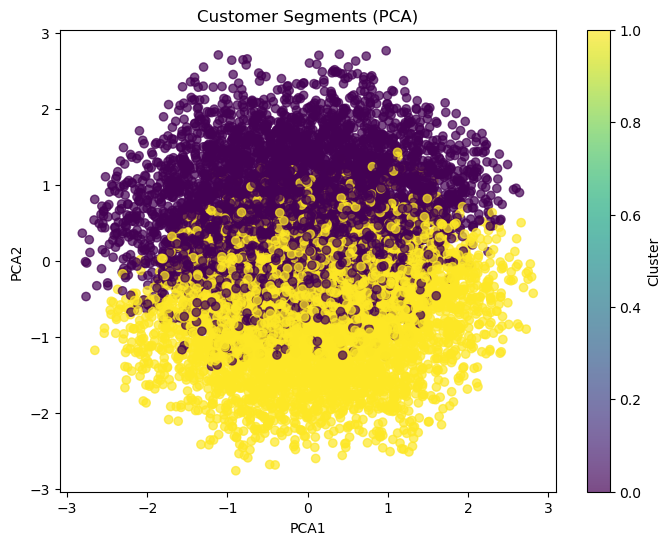

In [87]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_final.drop(columns=['Cluster']))  # Drop 'Cluster' to avoid including it in PCA

# Convert PCA results to DataFrame
df_pca = pd.DataFrame(pca_features, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df_final['Cluster']  

# Scatter plot for PCA results
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Customer Segments (PCA)')
plt.colorbar(label='Cluster')
plt.show()




In [88]:
df_final.columns

Index(['Product Name_Headphones', 'Product Name_Laptop',
       'Product Name_Smartphone', 'Product Name_Smartwatch',
       'Product Name_Tablet', 'Category_Accessories', 'Category_Electronics',
       'Customer Gender_Female', 'Customer Gender_Male',
       'Payment Method_Bank Transfer', 'Payment Method_Credit Card',
       'Payment Method_Debit Card', 'Payment Method_PayPal', 'Region_Africa',
       'Region_Asia', 'Region_Europe', 'Region_North America',
       'Region_South America', 'Membership Status_Premium',
       'Membership Status_Regular', 'Price_scaled', 'Quantity Sold_scaled',
       'Customer Age_scaled', 'Discount_scaled', 'Cluster'],
      dtype='object')

In [89]:
df['Cluster'] = df_final['Cluster']


In [90]:
# Cluster summary - mean values for each cluster
cluster_summary = df.groupby("Cluster")[['Price', 'Quantity Sold', 'Customer Age', 'Discount']].mean()
print(cluster_summary)


              Price  Quantity Sold  Customer Age  Discount
Cluster                                                   
0        783.257253       3.052853     29.457658  0.147654
1        765.082040       2.919680     53.551848  0.152072


In [92]:
cluster_counts = df['Cluster'].value_counts()
print(cluster_counts)

Cluster
1    5005
0    4995
Name: count, dtype: int64


CLUSTER ANALYSIS

Customer Distribution Across Clusters

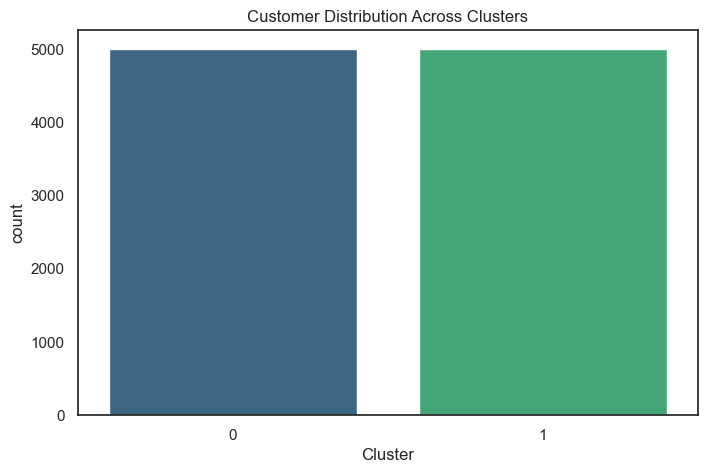

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")


plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=df_final, palette='viridis')
plt.title("Customer Distribution Across Clusters")
plt.show()

Average Spending Behavior by Cluster

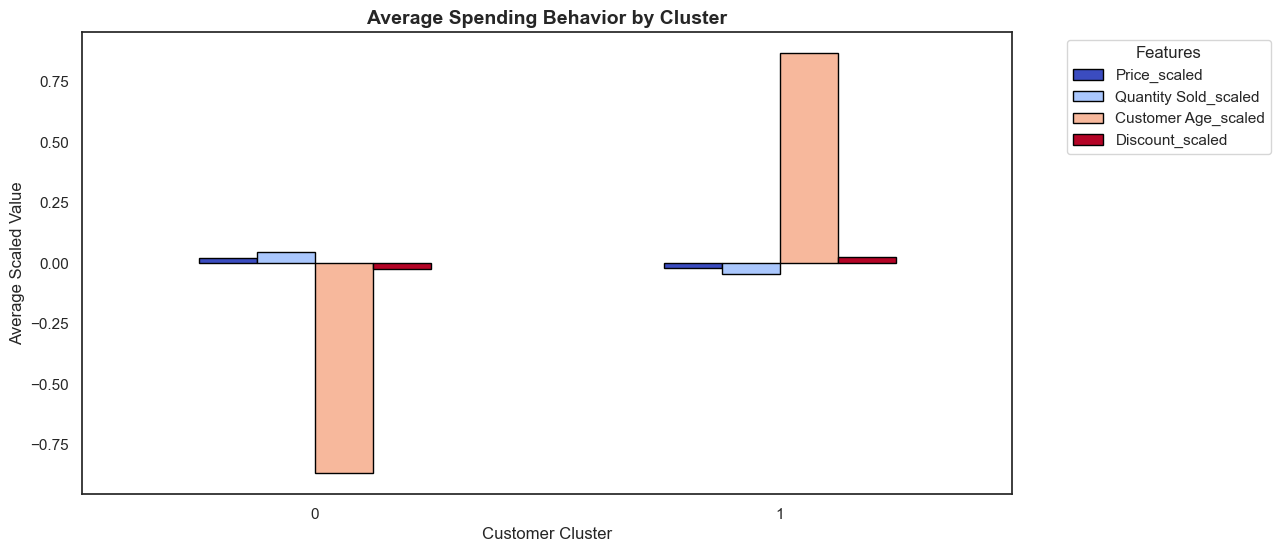

In [93]:
cluster_means = df_final.groupby('Cluster')[['Price_scaled', 'Quantity Sold_scaled', 'Customer Age_scaled', 'Discount_scaled']].mean()

cluster_means.plot(kind='bar', figsize=(12, 6), colormap='coolwarm', edgecolor='black')

plt.title("Average Spending Behavior by Cluster", fontsize=14, fontweight='bold')
plt.xlabel("Customer Cluster", fontsize=12)
plt.ylabel("Average Scaled Value", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Features", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


Region-wise Customer Trends by Cluster

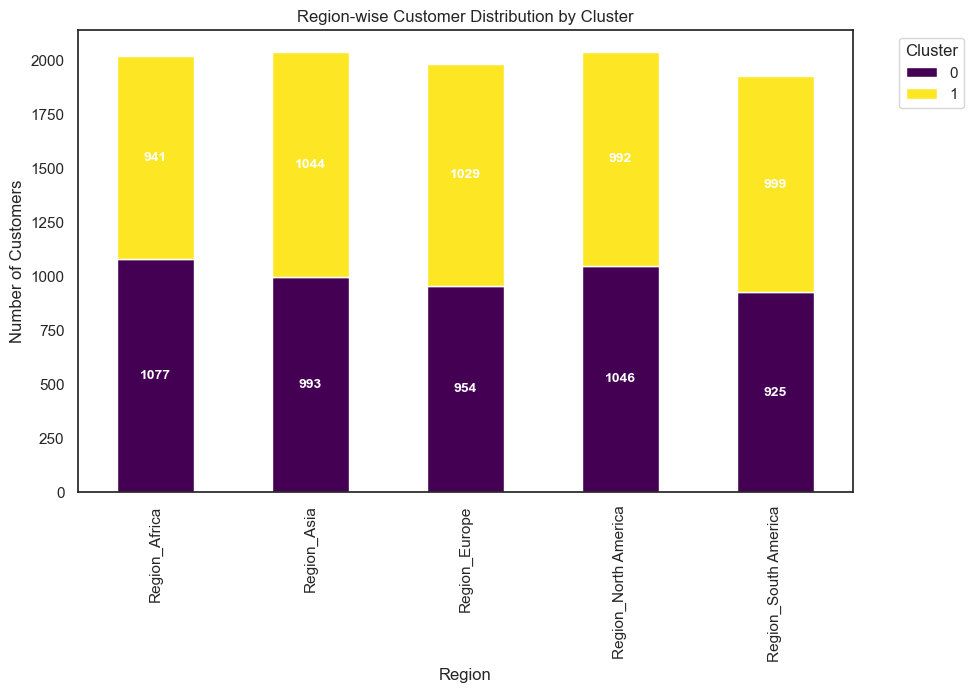

In [94]:
import matplotlib.pyplot as plt

region_cols = ['Region_Africa','Region_Asia', 'Region_Europe', 'Region_North America','Region_South America']
region_cluster = df_final.groupby('Cluster')[region_cols].sum()

ax= region_cluster.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=10, color='white', fontweight='bold')
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.title("Region-wise Customer Distribution by Cluster")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Payment Method Trends Across Clusters

<Figure size 1000x600 with 0 Axes>

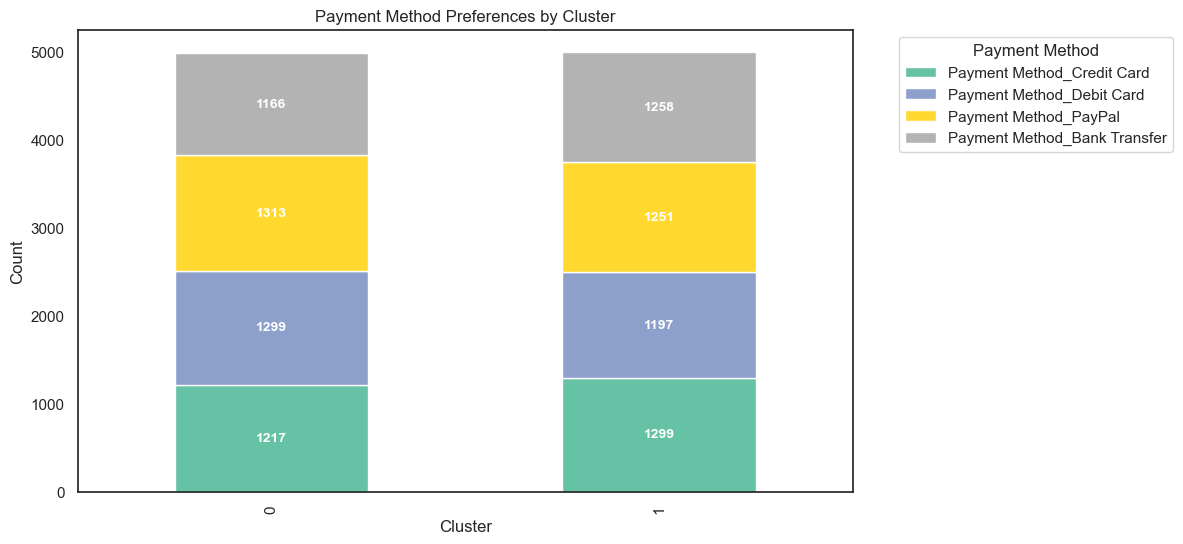

In [95]:
plt.figure(figsize=(10, 6))
payment_cols = ['Payment Method_Credit Card', 'Payment Method_Debit Card', 'Payment Method_PayPal', 'Payment Method_Bank Transfer']
payment_cluster = df_final.groupby('Cluster')[payment_cols].sum()
ax = payment_cluster.plot(kind='bar', stacked=True, colormap='Set2', figsize=(10, 6))
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=10, color='white', fontweight='bold')
plt.title("Payment Method Preferences by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title="Payment Method",bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Membership Status

<Figure size 800x500 with 0 Axes>

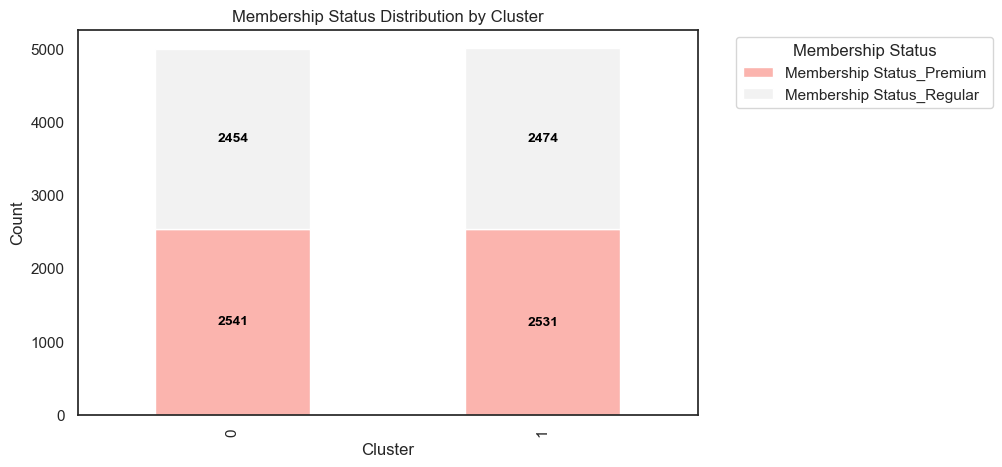

In [96]:
plt.figure(figsize=(8, 5))
membership_cols = ['Membership Status_Premium', 'Membership Status_Regular']
membership_cluster = df_final.groupby('Cluster')[membership_cols].sum()
ax=membership_cluster.plot(kind='bar', stacked=True, colormap='Pastel1', figsize=(8, 5))
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=10, color='black', fontweight='bold')
plt.title("Membership Status Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title="Membership Status",bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()